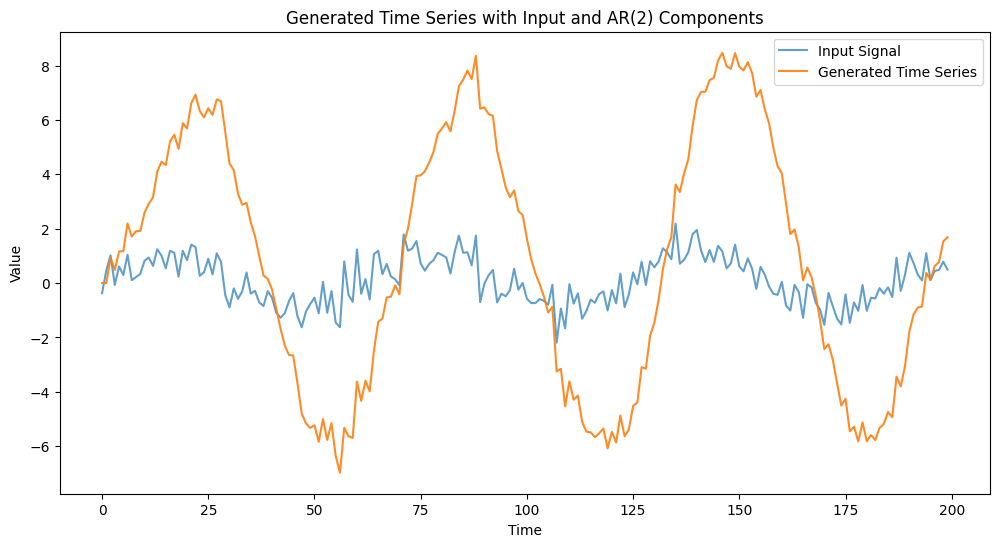

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
n = 200  # Number of time steps
phi1 = 0.6  # Coefficient for AR(1)
phi2 = 0.3  # Coefficient for AR(2)
sigma = 0.1  # Standard deviation of noise

# Generate input signal
input_signal = np.sin(np.linspace(0, 20, n)) + np.random.normal(0, 0.5, n)

# Initialize time series
time_series = np.zeros(n)

# Generate time series with AR(2) components
for t in range(2, n):
    time_series[t] = phi1 * time_series[t-1] + phi2 * time_series[t-2] + input_signal[t] + np.random.normal(0, sigma)

# Create a DataFrame for visualization
df = pd.DataFrame({
    'Time': np.arange(n),
    'Input': input_signal,
    'Time Series': time_series
})

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Input'], label='Input Signal', alpha=0.7)
plt.plot(df['Time'], df['Time Series'], label='Generated Time Series', alpha=0.9)
plt.legend()
plt.title('Generated Time Series with Input and AR(2) Components')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [2]:
from ARX.Regressors import LinearBayes

# Initialise model
model = LinearBayes(N_AR=2)

# Extract data for training
X = np.vstack(df['Input'].values)
y = df['Time Series'].values

# Train
model.train(X, y)

# Predictions
y0 = y[:model.N_AR]
Y_pred = model.predict(X[model.N_AR:, :], y0=y0)

c:\Users\plgreen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


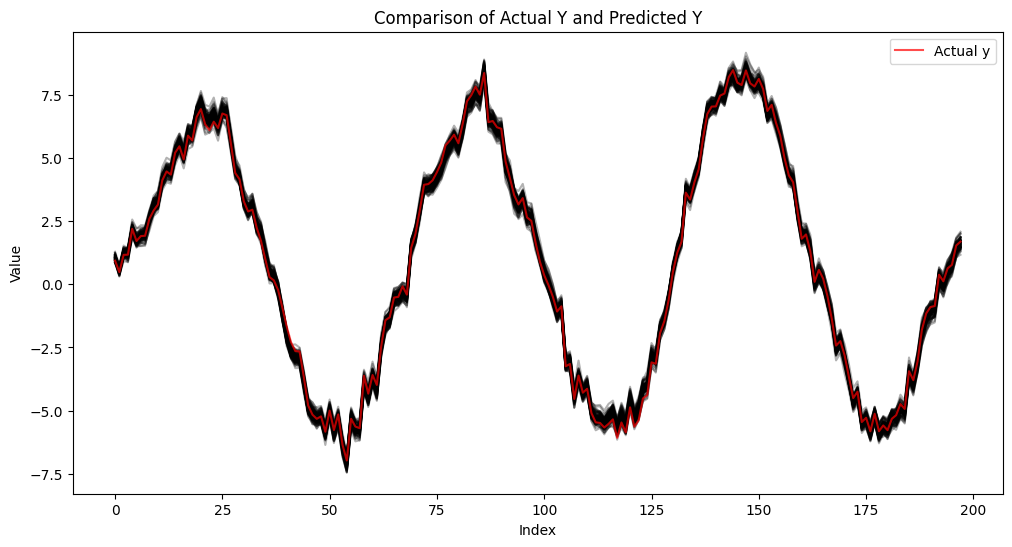

In [ ]:
plt.figure(figsize=(12, 6))
for i in range(Y_pred.shape[1]):
    plt.plot(Y_pred[:, i], color='black', alpha=0.1)
plt.plot(y[model.N_AR:], color='red', label='Actual y', alpha=0.7)
plt.legend()
plt.title('Comparison of Actual Y and Predicted Y')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()